<a href="https://colab.research.google.com/github/rencinj/Time-Series/blob/main/Time_Series_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv('/content/PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
# Getting an idea about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112347 entries, 0 to 112346
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  112347 non-null  object 
 1   PJME_MW   112347 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [5]:
# Converting 'Datetime' column to correct data type
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112347 entries, 0 to 112346
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  112347 non-null  datetime64[ns]
 1   PJME_MW   112347 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 MB


In [6]:
# Setting the 'Datetime' column as index
df.set_index('Datetime', inplace = True)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


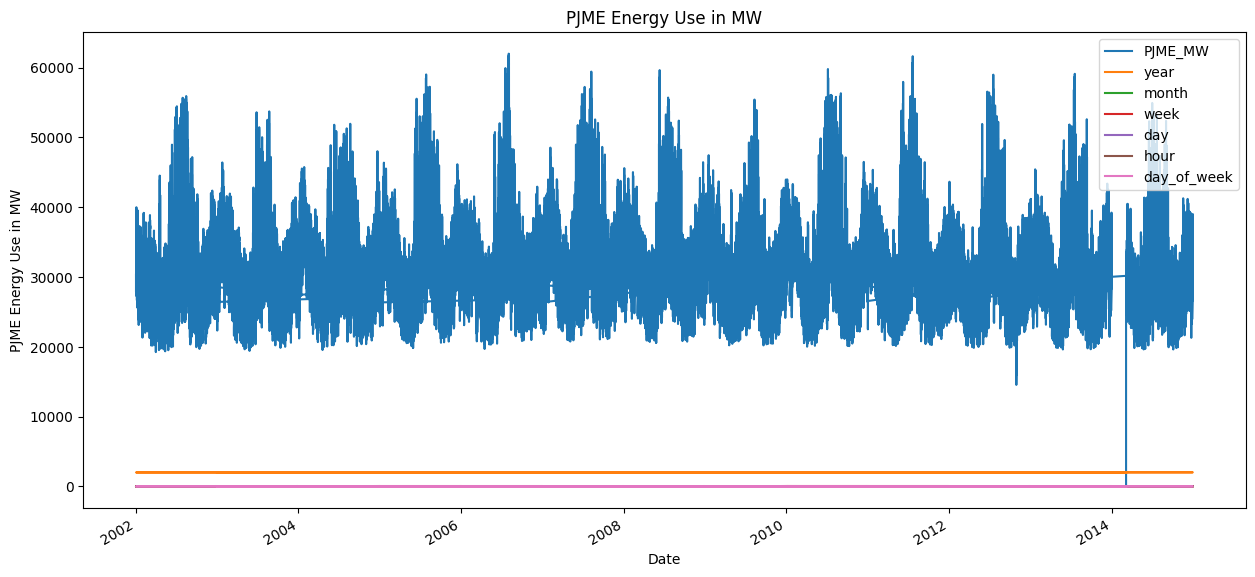

In [10]:
# Plot
df.plot(figsize = (15, 7), title = 'PJME Energy Use in MW')
plt.xlabel('Date')
plt.ylabel('PJME Energy Use in MW')
plt.show()

In [11]:
# Extracting features
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x : x.week)
df = df.set_index('Datetime')
df['day'] = [x for x in df.index.day]
df['hour'] = [x for x in df.index.hour]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]
df['day_of_week'] = [x.dayofweek for x in df.index]
df.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,2002,12,1,31,1,Tue,2002_12,1
2002-12-31 02:00:00,25147.0,2002,12,1,31,2,Tue,2002_12,1
2002-12-31 03:00:00,24574.0,2002,12,1,31,3,Tue,2002_12,1
2002-12-31 04:00:00,24393.0,2002,12,1,31,4,Tue,2002_12,1
2002-12-31 05:00:00,24860.0,2002,12,1,31,5,Tue,2002_12,1


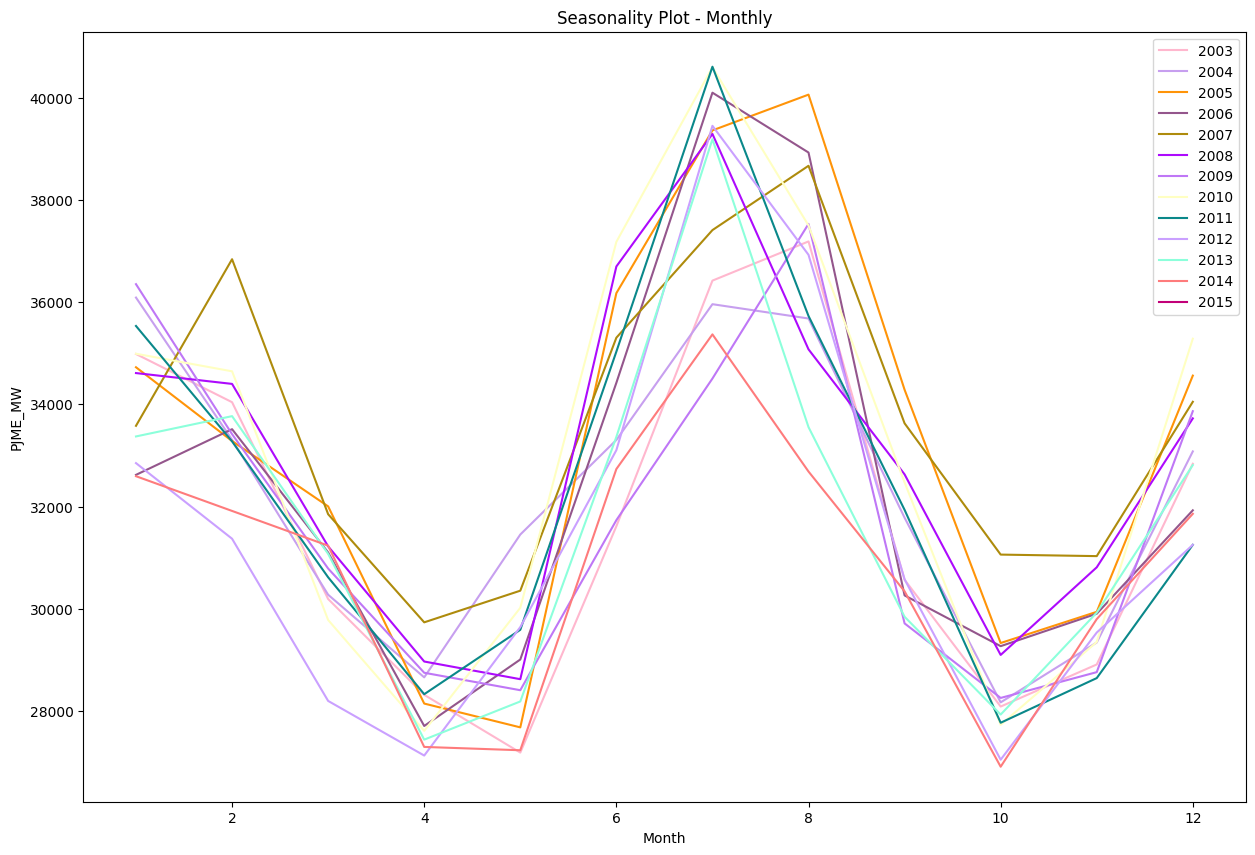

In [12]:
# Monthly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(years), replace = False)

# Plot
plt.figure(figsize = (15, 10))
for i, y in enumerate(years):
  if i > 0:
    plt.plot('month', 'PJME_MW',data = df_plot[df_plot['year'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Monthly')
plt.xlabel('Month')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

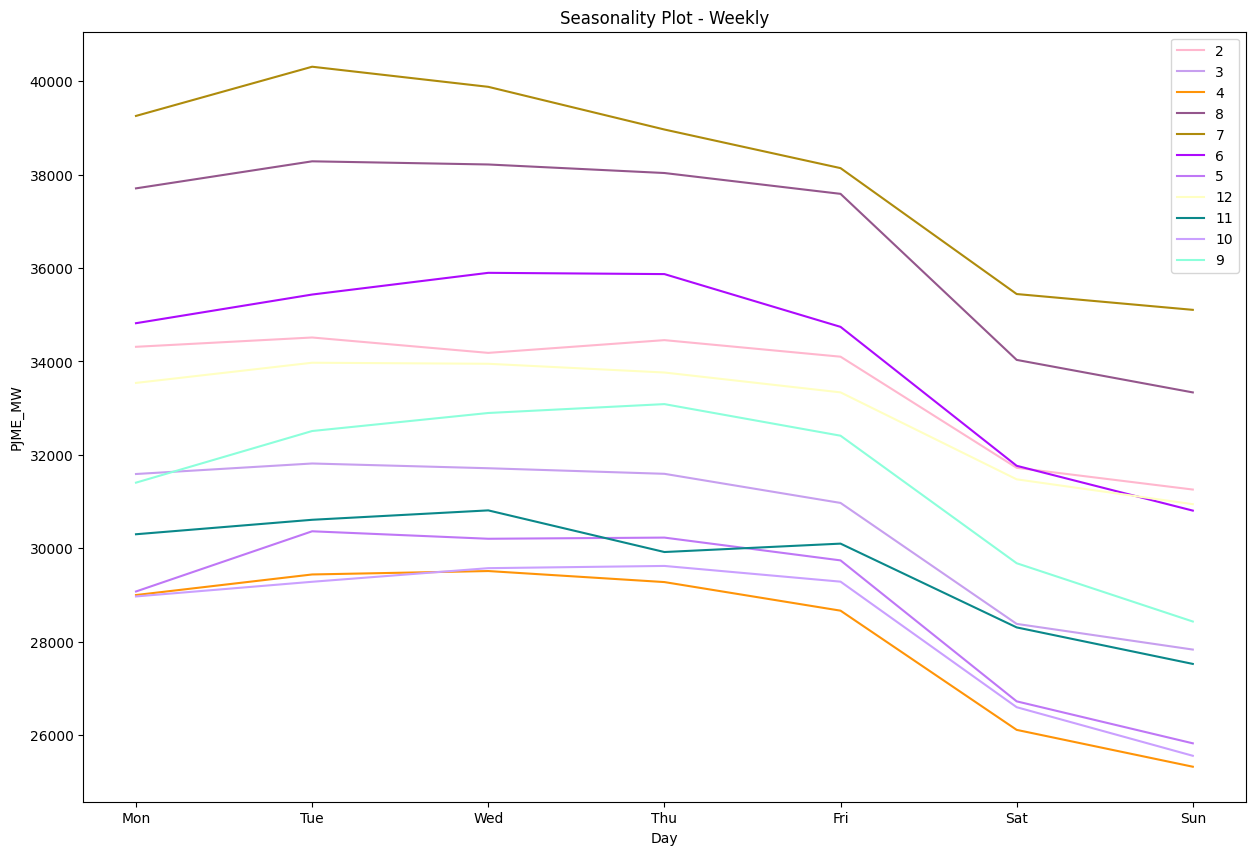

In [13]:
# Weekly Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['day_str', 'month', 'PJME_MW', 'day_of_week']].dropna().groupby(['day_str', 'month', 'day_of_week']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'day_of_week', ascending = True)
df_plot = df_plot.drop('day_of_week', axis = 1)
months = df_plot['month'].unique()
colors = np.random.choice(list(matplotlib.colors.XKCD_COLORS.keys()), len(months), replace = False)

# Plot
plt.figure(figsize = (15, 10))
for i, y in enumerate(months):
  if i > 0:
    plt.plot('day_str', 'PJME_MW',data = df_plot[df_plot['month'] == y], color = colors[i], label = y)

# Setting the labels
plt.title('Seasonality Plot - Weekly')
plt.xlabel('Day')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

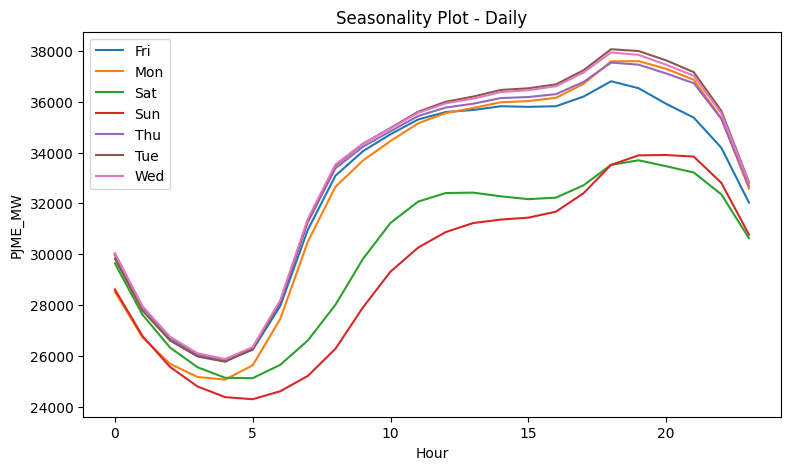

In [ ]:
# Daily Seasonal Plot
import matplotlib
np.random.seed(5)
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by = 'hour', ascending = True)

# Plot using seaborn
plt.figure(figsize = (9, 5))
sns.lineplot(x = 'hour', y = 'PJME_MW', hue = 'day_str', data = df_plot, legend = True)

# Setting the labels
plt.title('Seasonality Plot - Daily')
plt.xlabel('Hour')
plt.ylabel('PJME_MW')
plt.legend()
plt.show()

In [ ]:
'''
Homework -> Please write conclusions from the above plots

Based on the plots you've generated, here are some conclusions:

Overall Trend (from the first plot): There's a clear overall trend in energy consumption over time, with noticeable fluctuations.
There seems to be a general upward trend in consumption over the years.

Monthly Seasonality (from the monthly plot): The monthly seasonality plot shows a strong pattern.
Energy consumption is generally higher during certain months of the year, likely corresponding to periods of
higher heating or cooling demand (e.g., summer and winter months). The pattern appears to repeat each year.

Weekly Seasonality (from the weekly plot): The weekly seasonality plot indicates that energy consumption varies throughout the week.
 There are likely differences in consumption between weekdays and weekends.

Daily Seasonality (from the daily plot): The daily seasonality plot reveals a consistent pattern within each day,
with consumption peaking at certain hours and being lower at others. The shape of this daily pattern might vary
slightly depending on the day of the week (as shown by the different colored lines).

Outliers (from the boxplot): The boxplot shows the distribution of the data and highlights potential outliers, which are data points
that are significantly different from the majority of the data. These outliers could represent unusual events or errors in the data.

Time Series Decomposition (from the additive and multiplicative decomposition plots): The decomposition plots separate the time series
 into its trend, seasonal, and residual components. This helps to see the underlying trend more clearly and to understand the strength
  and nature of the seasonality and the remaining noise.

'''

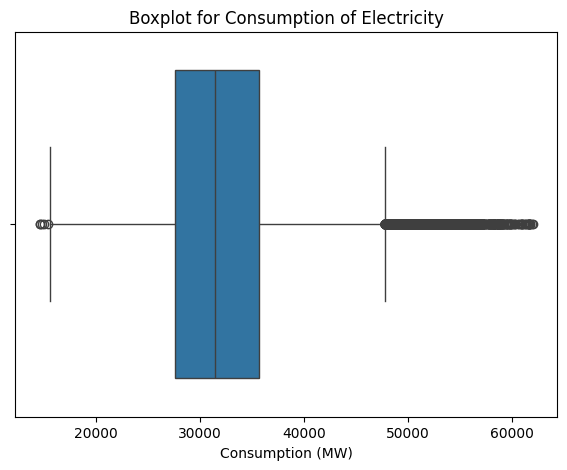

In [ ]:
# Boxplot for outliers
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'PJME_MW', data = df)
plt.xlabel('Consumption (MW)')
plt.title(f'Boxplot for Consumption of Electricity')
plt.show()

In [ ]:
# Filtering the data
df_plot = df[df['year'] >= 2017].reset_index().sort_values(by = 'Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week
Datetime,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6


In [ ]:
'''
Time Series -> trend component + seasonal component + noise component
Sometimes, there can be more than 1 seasonal component as well.

There are two main types of decomposition : additive and multiplicative

Additive -> T + S + R
Multiplicative -> T * S * R

Additive decomposition is best suited for scenarios with constant variance
Multiplicative decompostion is best suited for scenarios with non-constant variance
'''

In [ ]:
# Adding new columns
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']
df_plot.head()

,PJME_MW,year,month,week,day,hour,day_str,year_month,day_of_week,PJME_MW - Multiplicative Decompose,PJME_MW - Additive Decompose
Datetime,,,,,,,,,,,
2017-01-01 00:00:00,28171.0,2017,1,52,1,0,Sun,2017_1,6,28171.0,28171.0
2017-01-01 01:00:00,26879.0,2017,1,52,1,1,Sun,2017_1,6,26879.0,26879.0
2017-01-01 02:00:00,25848.0,2017,1,52,1,2,Sun,2017_1,6,25848.0,25848.0
2017-01-01 03:00:00,25039.0,2017,1,52,1,3,Sun,2017_1,6,25039.0,25039.0
2017-01-01 04:00:00,24637.0,2017,1,52,1,4,Sun,2017_1,6,24637.0,24637.0


In [ ]:
# Importing 'seasonal_decompose'
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decompostion
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model = 'additive', period = 24*7)

# Multiplicative Decompostion
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model = 'multiplicative', period = 24*7)

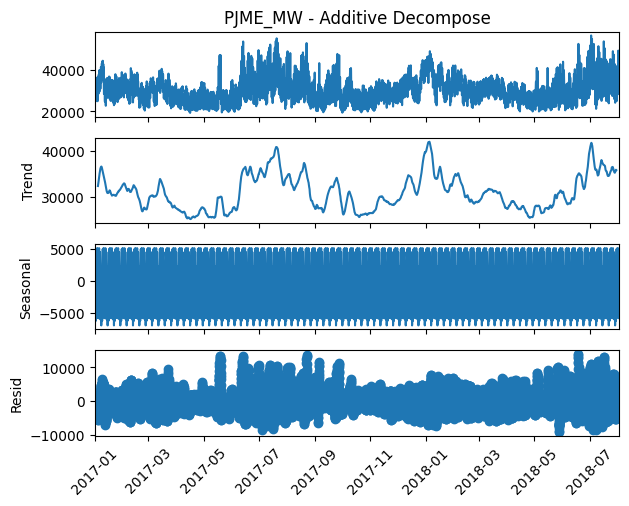

In [ ]:
# Plot
result_add.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()

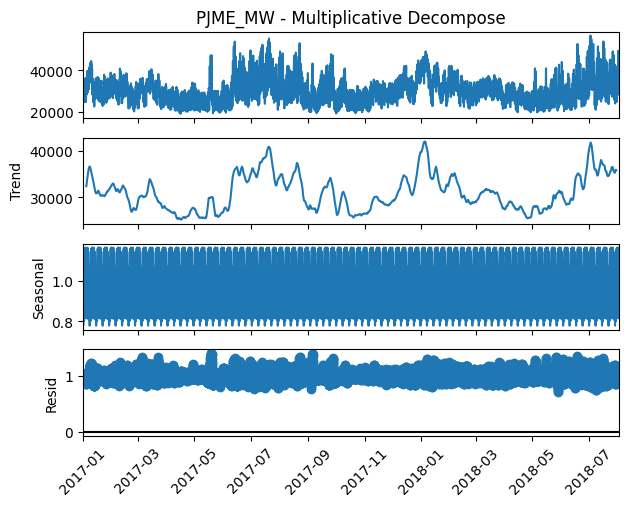

In [ ]:
# Plot
result_mul.plot().suptitle('', fontsize = 22)
plt.xticks(rotation = 45)
plt.show()